# 一、資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)，可自行更換可用字體
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊
pd.set_option("display.html.table_schema",True)
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
417,北投區,31.13,111.90,71492,3,2,2,0.00,0,31,75,106,800.0,0,0,0,0,1,0,0,0,0,0,0,0
594,北投區,35.17,127.74,105683,3,2,2,0.00,0,33,73,106,1350.0,0,0,0,0,1,0,0,0,0,0,0,0
506,內湖區,19.00,57.98,86237,2,1,1,0.00,0,38,68,106,500.0,0,0,0,1,0,0,0,0,0,0,0,0
350,萬華區,26.41,200.45,202045,3,1,2,26.90,0,1,105,106,4050.0,0,0,0,0,0,0,0,0,0,0,0,1
332,萬華區,30.68,145.95,137033,3,2,2,21.12,0,3,103,106,2000.0,0,0,0,0,0,0,0,0,0,0,0,1


# 二、檢查特徵相關性及線性關係

In [2]:
# 把DataFrame加上highlight背景色
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    return ['background-color: yellow' if v else '' for v in is_high]

## 相關性分析

In [3]:
df_ml.corr().round(3).style.apply(highlight_highcorr)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
土地移轉總面積平方公尺,1,0.678,0.069,0.34,0.22,0.242,0.39,0.348,-0.068,0.068,-0.009,0.515,-0.207,-0.107,0.039,0.157,0.06,0.08,0.121,-0.081,-0.056,0.116,-0.049,-0.109
建物移轉總面積平方公尺,0.678,1,0.272,0.197,0.06,0.153,0.736,0.625,-0.411,0.411,-0.083,0.862,-0.092,-0.021,0.033,0.121,0.018,0.092,0.062,-0.03,-0.001,-0.003,-0.058,-0.132
單價每平方公尺,0.069,0.272,1,-0.081,-0.007,0.018,0.26,0.368,-0.362,0.362,-0.046,0.567,0.056,0.05,0.084,-0.05,-0.13,0.006,0.04,-0.067,0.317,-0.125,0.096,-0.203
建物現況格局-房,0.34,0.197,-0.081,1,0.675,0.755,0.032,-0.008,0.097,-0.097,-0.041,0.069,-0.084,-0.117,-0.036,0.122,-0.039,0.017,0.021,-0.01,0.016,0.073,0.024,-0.022
建物現況格局-廳,0.22,0.06,-0.007,0.675,1,0.582,-0.043,-0.08,0.046,-0.046,-0.006,-0.015,-0.046,-0.15,-0.06,0.069,-0.031,0.028,0.052,-0.019,0.048,0.071,0.052,-0.04
建物現況格局-衛,0.242,0.153,0.018,0.755,0.582,1,0.015,-0.012,-0.031,0.031,-0.084,0.067,-0.011,-0.121,0.007,0.081,-0.035,0.034,0.039,-0.037,0.042,0.049,-0.032,-0.058
車位移轉總面積平方公尺,0.39,0.736,0.26,0.032,-0.043,0.015,1,0.739,-0.464,0.464,-0.086,0.631,-0.041,-0.049,0.005,0.101,0.066,0.053,0.046,-0.023,-0.016,0.014,-0.094,-0.106
車位總價元,0.348,0.625,0.368,-0.008,-0.08,-0.012,0.739,1,-0.359,0.359,-0.053,0.683,0.017,-0.021,-0.01,0.007,0.053,0.027,0.09,-0.031,-0.013,-0.012,-0.045,-0.087
屋齡,-0.068,-0.411,-0.362,0.097,0.046,-0.031,-0.464,-0.359,1,-1,0.143,-0.403,-0.068,0.003,0.091,-0.097,-0.076,-0.12,0.113,-0.005,0.019,-0.105,0.155,0.149
建築完成年,0.068,0.411,0.362,-0.097,-0.046,0.031,0.464,0.359,-1,1,-0.143,0.403,0.068,-0.003,-0.091,0.097,0.076,0.12,-0.113,0.005,-0.019,0.105,-0.155,-0.149


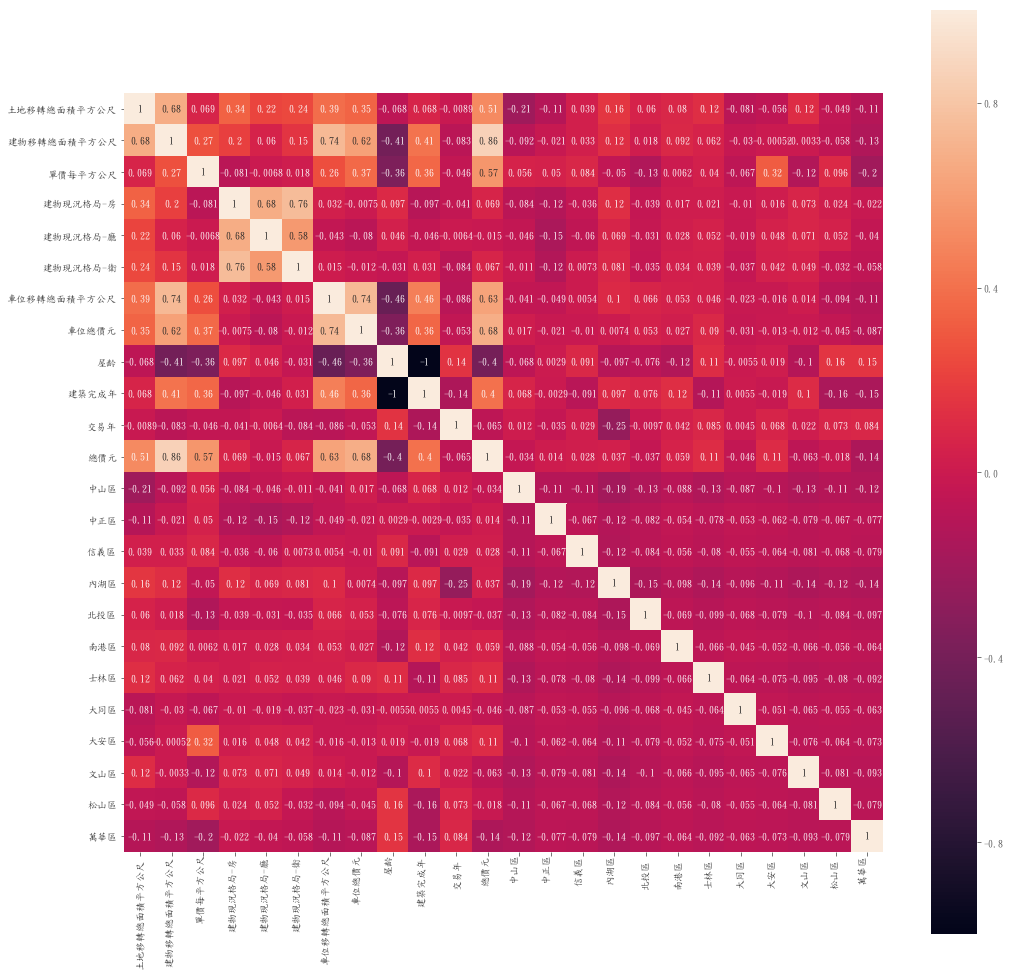

In [4]:
corr = df_ml.corr()
import seaborn as sns
plt.figure(figsize=(17,17))
sns.heatmap(corr, square=True, annot=True)

## 散佈圖矩陣

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C4EEE80>,
      dtype=object)

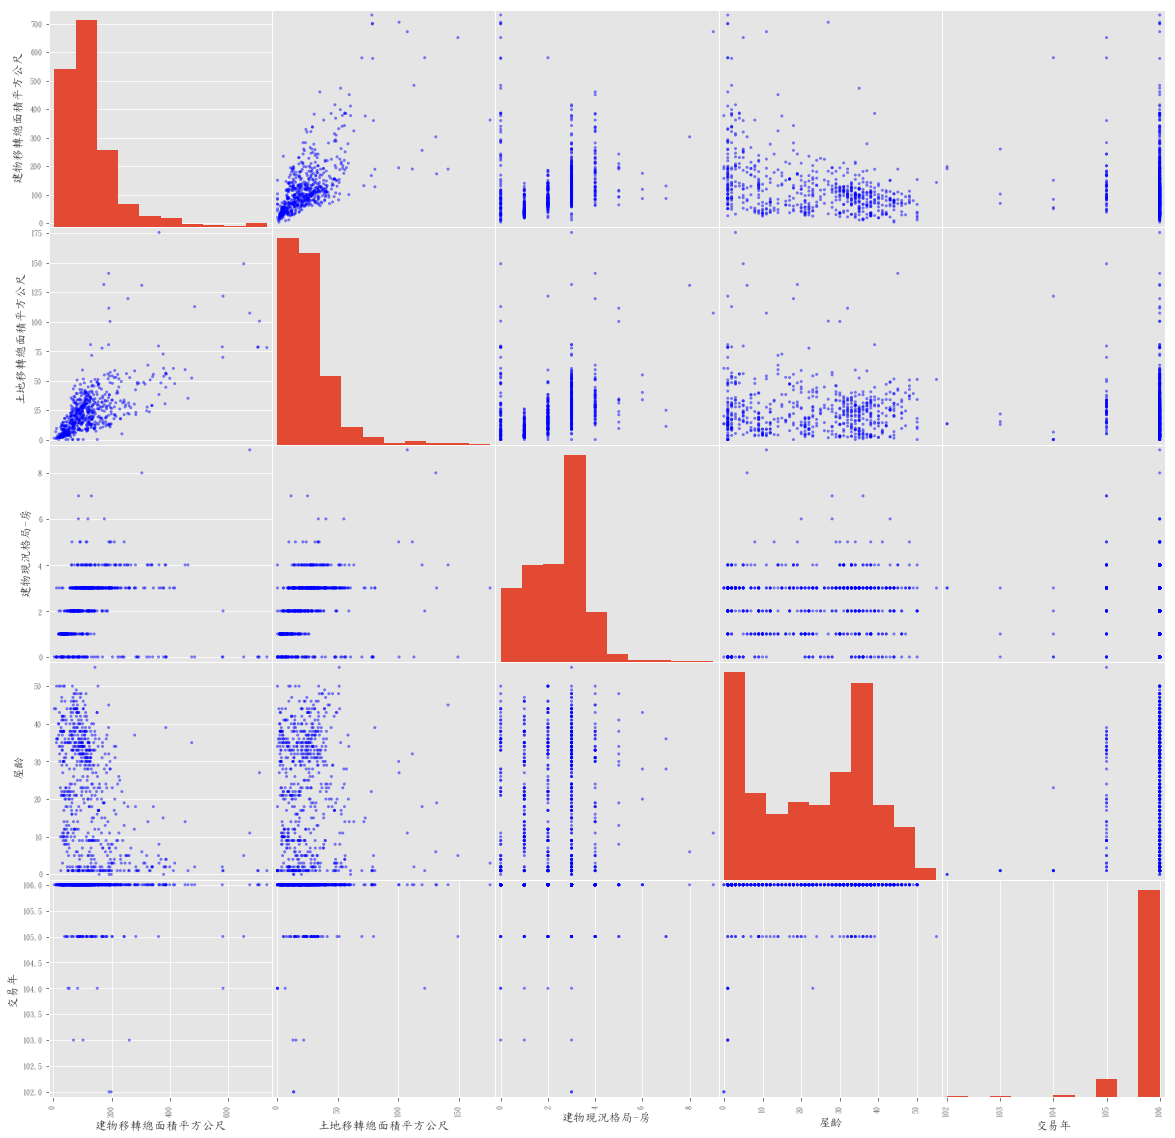

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','建物現況格局-房','屋齡','交易年']],figsize=(20, 20),color='b')

# 三、建模前預處理

## 切分訓練及測試資料

In [6]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','中山區','中正區','信義區','內湖區','北投區','南港區','士林區','大同區','大安區','文山區','松山區','萬華區']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,土地移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
139,76.96,5.64,236486,2,1,1,0.0,0,1,105,106,1,0,0,0,0,0,0,0,0,0,0,0
232,124.34,12.61,95544,3,2,2,0.0,0,30,76,106,0,0,0,0,0,0,0,0,0,0,0,1
413,79.92,23.18,223724,2,2,1,0.0,0,12,94,106,0,0,0,0,1,0,0,0,0,0,0,0
409,104.95,29.32,100048,3,2,2,0.0,0,34,72,106,0,0,0,0,1,0,0,0,0,0,0,0
577,53.56,4.96,74683,0,0,0,0.0,0,36,70,106,0,0,0,0,0,0,0,0,0,0,1,0


## 標準化

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## 產生高次方項

In [8]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)

## plot_learning_curve function

In [9]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


# 四、線性迴歸

## 多變項

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

各變項參數: [[ 2.25779939e+03 -2.00053156e+02  9.37752711e+02 -7.83948285e+01
  -4.31381406e+01 -6.93713666e+00 -3.61835518e+02  7.22269691e+02
   9.56231577e+01 -9.56231577e+01  1.68332296e+01 -1.36154075e+01
  -6.30349492e+00 -1.23453193e+02  2.05567805e+01 -2.23118890e+01
  -2.57531075e+01  1.16562898e+02 -1.82886225e+01 -7.69367539e-01
   3.35973241e+01 -4.92939398e+01  4.94381046e+01]]
MSE: 854594.08
R Square: 0.7543442650823798


<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

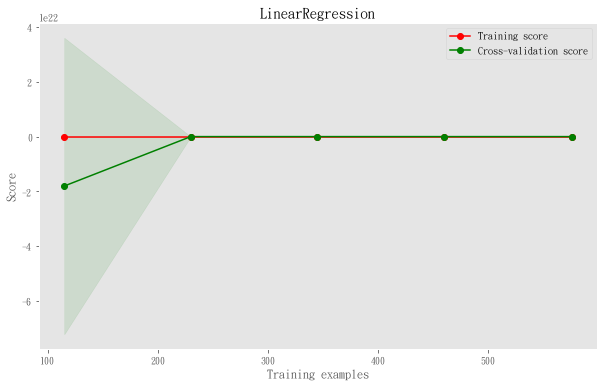

In [11]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 非線性

In [12]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",lr.score(X_test_poly, y_test))

各變項參數: [[ 2.70234860e+09  1.80795315e+03  3.25553407e+00  8.75504037e+02
   7.64662315e+00 -1.05087820e+12  1.09141015e+12  5.38407399e+12
  -3.00186234e+02 -3.43659973e+13 -3.43659973e+13  4.38105813e+12
  -1.03620117e+14  2.80682995e+12  4.83976270e+13  4.15596479e+13
  -2.83611383e+13  2.86818734e+13  2.39500334e+13 -2.70428876e+13
   8.67530730e+12  1.07168721e+13 -2.09703650e+12  1.43755981e+13
  -2.85324522e+01  2.61460488e+01  7.60325378e+02 -1.86723730e+01
  -9.32299781e+00  2.02717043e+01  7.31733374e+01 -7.73141988e+01
   7.16702820e+11  7.16702820e+11  1.59404297e+01  9.83419110e+12
   7.02476520e+12  7.02476520e+12  1.08675216e+13  8.19163714e+12
   5.94027607e+12  8.01388528e+12  5.05559903e+12  6.45094341e+12
   7.92276915e+12  6.45094341e+12  7.54209663e+12 -4.47143555e+00
   6.22705078e+00  1.78630371e+01 -7.48388672e+00 -1.05615234e+01
  -3.14277344e+01  4.37197266e+01 -2.81971309e+12 -2.81971309e+12
  -3.06445312e+00  2.96508450e+12  2.11802091e+12  2.11802091e+12
   

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

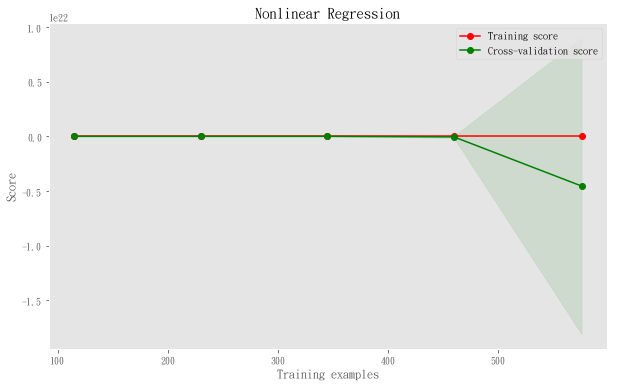

In [13]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 五、脊迴歸(Ridge Regression): L2 正規化

## 多變項

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train_std, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_std) - y_test) ** 2))
print("R Square:",ridge.score(X_test_std, y_test))

各變項參數: [[ 2.23175270e+03 -1.86148470e+02  9.34472255e+02 -7.81057462e+01
  -4.40650628e+01 -6.74071825e+00 -3.47783652e+02  7.22054254e+02
   9.29971793e+01 -9.29971793e+01  1.60583275e+01 -1.30812931e+01
  -4.82751507e+00 -1.22153200e+02  1.89535809e+01 -2.37324638e+01
  -2.56758619e+01  1.16393394e+02 -1.76356767e+01  9.88914071e-01
   3.09848421e+01 -4.75352656e+01  4.94268877e+01]]
MSE: 859842.73
R Square: 0.7528355231394941


<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

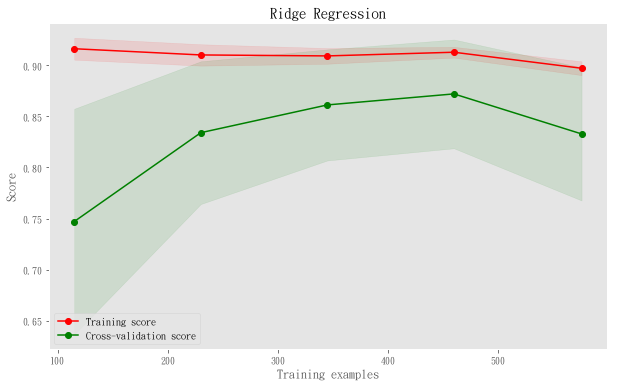

In [15]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 高次方項

In [16]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_poly, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_poly) - y_test) ** 2))
print("R Square:",ridge.score(X_test_poly, y_test))

各變項參數: [[ 0.00000000e+00  1.70857302e+03  4.75356340e+01  8.53405054e+02
   9.68368456e+00 -9.15624641e+00  1.95996047e+01 -3.85122764e+01
  -1.86938379e+02 -1.28051828e+01  1.28051828e+01 -3.87815279e-01
   1.45058186e-01  1.42917968e+00  2.52292218e-01 -6.06878536e-01
   2.89771482e-01  3.95935068e-01  1.72092582e-01  4.53476813e-01
   6.41328085e-01 -2.00881608e+00  1.75882467e+00 -1.93692384e+00
   3.08001955e-01 -1.91374388e-01  7.06891206e+02 -7.21908154e+00
  -5.77762645e+00  8.77328332e+00  4.75653455e+01 -5.88960295e+01
  -2.52324807e+01  2.52324807e+01  3.00605532e+01  2.59080397e+01
  -1.33096455e+00  7.99932729e+00 -6.28828654e+00 -1.48683077e+01
  -3.40839431e+00  3.18087309e+00 -1.18381244e+01  1.93992732e+01
  -2.30464827e+01 -5.82838483e+00  5.05919890e+00 -8.27556720e+00
   3.14727795e+01  4.83266581e+00 -1.94395848e+01  4.44952919e+00
  -1.52665852e+01  2.78180830e+01  5.46513321e+00 -5.46513321e+00
  -7.29649063e+00 -1.82947491e+01  2.18472585e+01 -8.15690005e+00
   

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

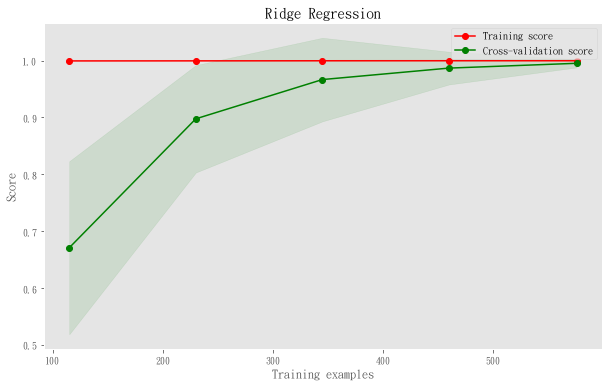

In [17]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 六、LASSO: L1 正規化

## 多變項

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train_std, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_std) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_std, y_test))

各變項參數: [ 2.24742740e+03 -1.93291525e+02  9.35736246e+02 -7.81229592e+01
 -4.24488536e+01 -6.83902456e+00 -3.54961423e+02  7.20475376e+02
  1.87985662e+02 -2.04712437e-12  1.55557188e+01 -4.85174040e+00
 -0.00000000e+00 -1.16605227e+02  2.66113753e+01 -1.60201536e+01
 -2.05242566e+01  1.21940611e+02 -1.31706998e+01  4.08459112e+00
  3.72535973e+01 -4.24429208e+01  5.45233499e+01]
MSE: 854590.11
R Square: 0.7543454062778552


<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

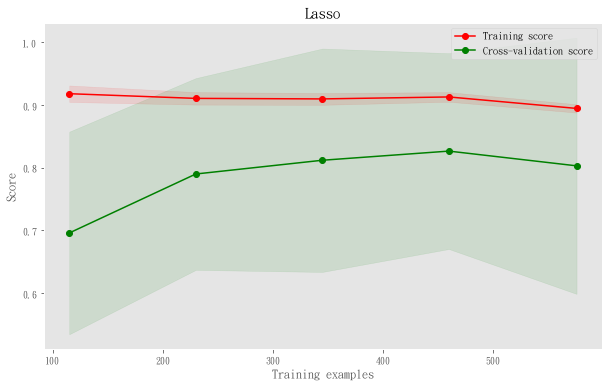

In [19]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Lasso(alpha=1)

plot_learning_curve(estimator, "Lasso", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 高次方項

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train_poly, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_poly) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_poly, y_test))

各變項參數: [ 0.00000000e+00  1.75323367e+03  1.29347736e+01  8.63509317e+02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.47781775e+01
 -9.27416951e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  9.62414972e+00  0.00000000e+00  7.48898491e+02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  5.55695681e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.02044493e+01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -

c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

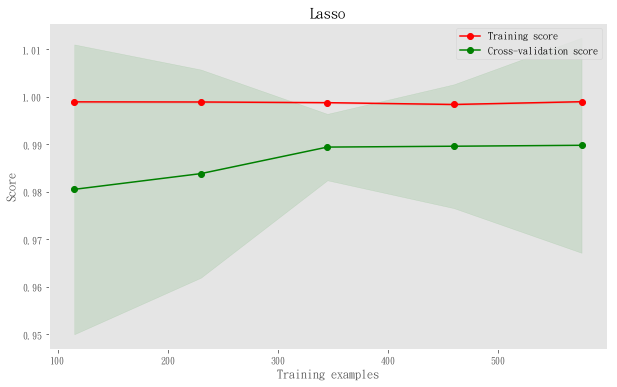

In [21]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Lasso(alpha=10)

plot_learning_curve(estimator, "Lasso", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 七、Elastic Net: L1+L2 正規化

In [22]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_std, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",elastic.score(X_test_std, y_test))

各變項參數: [934.27781127 337.8339412  615.55092001 -25.53428311 -67.80889967
 -18.50029419 294.04080299 614.77035225 -78.55310868  78.55359021
  -7.50545424 -13.14820002  40.54411154 -20.71945314 -35.07235278
 -70.60430099  -5.84633921 110.8405069   -5.26144471  85.94500599
 -80.23412698  27.29753486   6.25107858]
MSE: 1236508.94
R Square: 0.6445616459971981


## 高次方項

In [23]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_poly, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_poly) - y_test.values.ravel()) ** 2))
print("R Square:",elastic.score(X_test_poly, y_test))

各變項參數: [ 0.00000000e+00  4.02209272e+02  2.21951564e+02  3.48396186e+02
  8.69806804e+01  8.38433378e+01  8.74372424e+01  1.18396021e+02
  4.69412629e+01 -1.65698953e+02  1.65699026e+02 -7.10748170e-01
  1.43619335e+00  5.08769789e+00  6.59286685e+00 -3.98234886e+00
 -3.69234759e+00  2.42039548e+00 -9.23537620e-01  0.00000000e+00
  8.22597445e+00 -9.04269389e+00  5.02093572e+00 -6.20795416e+00
  1.52398186e+02 -2.75513312e+01  2.66457093e+02 -1.49977452e+01
 -6.69030467e+01 -7.73849858e+00  3.89617309e+01  3.26446692e+01
 -9.56027706e+01  9.56029520e+01  4.04792548e+01  9.05588757e+00
  3.76961638e+01 -3.80424482e+00 -2.52203079e+01 -2.50225002e+01
 -1.10202635e+01 -5.13680983e+00  1.07796185e+01  7.24423773e+01
 -4.18580768e+01  5.59156725e+01 -3.60192299e+01  1.78168780e+01
  8.87369065e+01 -2.89615158e+01 -2.83364880e+01 -6.23249079e+00
 -5.12513200e+01 -2.50113843e+01 -5.72022574e+00  5.72042313e+00
  2.07699110e+01 -5.66354584e+00  1.50999789e+01 -1.38173454e+01
  5.52816386e-02 -

c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

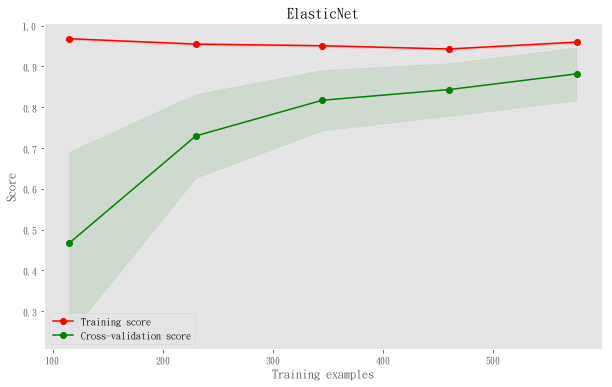

In [24]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = ElasticNet(alpha=1)

plot_learning_curve(estimator, "ElasticNet", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))